# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Lucas Wong Mang

- ID: A01639032

- My carreer: ITC


# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# PART 1
# Use your assigned dataset

## A1 Load data

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Herramientas Computacionales/"

else:
    # Define path del proyecto
    Ruta            = ""
Ruta_General = "/content/drive/My Drive/Herramientas Computacionales/"
url = "A01639032.csv"
url_iris=Ruta_General+url
# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url_iris)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,x1,x2
0,0,0.061241,-0.086113
1,1,0.282131,-0.478791
2,2,-0.063821,-1.920080
3,3,-0.631542,0.511644
4,4,0.626047,-1.148719
...,...,...,...
1755,1755,0.000221,-1.239892
1756,1756,-0.213566,1.134396
1757,1757,-0.603604,-0.829541
1758,1758,0.092442,0.521503


## A2 Data managment


Print the first 7 rows

In [4]:
print(df[0:7])

   Unnamed: 0        x1        x2
0           0  0.061241 -0.086113
1           1  0.282131 -0.478791
2           2 -0.063821 -1.920080
3           3 -0.631542  0.511644
4           4  0.626047 -1.148719
5           5 -0.735167  0.101752
6           6 -1.350365 -0.154354


Print the first 4 last rows

In [6]:
print(df.tail(4))

      Unnamed: 0        x1        x2
1756        1756 -0.213566  1.134396
1757        1757 -0.603604 -0.829541
1758        1758  0.092442  0.521503
1759        1759 -0.404623  0.916368


How many rows and columns are in your data?

Use the `shape` method


In [8]:
#number of rows
print("# of rows: "+str(df.shape[0]))
#number of columns
print("# of columns: "+str(df.shape[1]))

# of rows: 1760
# of columns: 3


Print the name of all columns 

Use the `columns` method

In [11]:
for col in df.columns:
    print(col)

Unnamed: 0
x1
x2


What is the data type in each column

Use the `dtypes` method 

In [12]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

#1) The First column helps us with the numbering of the data. We could call it Registration ID

#2) The Second Column: Measure Value in x1

#3) The Third Column: Measure Value in x2


Print a statistical summary of your columns


In [14]:
df.describe()

,Unnamed: 0,x1,x2
count,1760.000000,1760.000000,1760.000000
mean,879.500000,-0.246540,-0.502519
std,508.212554,0.527416,0.884361
min,0.000000,-1.513079,-2.604991
25%,439.750000,-0.664592,-1.130852
50%,879.500000,-0.248778,-0.508833
75%,1319.250000,0.181985,0.132711
max,1759.000000,0.910997,1.629550


In [15]:
# 1) What is the minumum and maximum values of each variable
# MAX: Unnamed 1759.000000 | x1 0.910997 | x2 1.629550
# MIN: Unnamed 0.000000	 | x1 -1.513079	 | x2 -2.604991

# 2) What is the mean and standar deviation of each variable
# MEAN: Unnamed 879.500000 | x1 -0.246540	 | x2 -0.502519
# STD: Unnamed 508.212554	 | x1 0.527416	 | x2 0.884361

# 3) What the 25%, 50% and 75% represent?
# QUARTILES OF THE DATA SET
# 25%: 25% of the data is less than or equal to the presented value.
# 50%: 50% of the data is less than or equal to the presented value.
# 75%: 75% of the data is less than or equal to the presented value.


Rename the columns using the same name with capital letters

In [17]:
df = df.rename(columns={"Unnamed: 0": "IndexOf", "x1" : "X1", "x2" : "X2"})
df

,IndexOf,X1,X2
0,0,0.061241,-0.086113
1,1,0.282131,-0.478791
2,2,-0.063821,-1.920080
3,3,-0.631542,0.511644
4,4,0.626047,-1.148719
...,...,...,...
1755,1755,0.000221,-1.239892
1756,1756,-0.213566,1.134396
1757,1757,-0.603604,-0.829541
1758,1758,0.092442,0.521503


Rename the columns to their original names

In [20]:
df = df.rename(columns={"IndexOf": "Unnamed: 0", "X1" : "x1", "X2" : "x2"})
df

,Unnamed: 0,x1,x2
0,0,0.061241,-0.086113
1,1,0.282131,-0.478791
2,2,-0.063821,-1.920080
3,3,-0.631542,0.511644
4,4,0.626047,-1.148719
...,...,...,...
1755,1755,0.000221,-1.239892
1756,1756,-0.213566,1.134396
1757,1757,-0.603604,-0.829541
1758,1758,0.092442,0.521503


Use two different alternatives to get one of the columns

In [21]:
print(df.iloc[:,0])
print(df["Unnamed: 0"])

0          0
1          1
2          2
3          3
4          4
        ... 
1755    1755
1756    1756
1757    1757
1758    1758
1759    1759
Name: Unnamed: 0, Length: 1760, dtype: int64
0          0
1          1
2          2
3          3
4          4
        ... 
1755    1755
1756    1756
1757    1757
1758    1758
1759    1759
Name: Unnamed: 0, Length: 1760, dtype: int64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [23]:
df.iloc[62:72, 1:3]

,x1,x2
62,-0.288807,1.152100
63,-0.987575,0.634461
64,-0.049114,-0.917804
65,-0.820674,-0.037642
66,0.204036,-2.042821
67,0.259124,-1.926188
68,-0.610273,0.456185
69,0.188958,-1.384221
70,0.076293,-1.693090
71,-1.025343,0.612962


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [30]:
Number_null = df.iloc[:,1:3].isnull().sum()
Number_notnull = df.iloc[:,1:3].notnull().sum()
print("Number of nulls: "+str(Number_null))
print("Number of not nulls: "+str(Number_notnull))
print("Number of rows: "+str(len(df)))

Number of nulls: x1    0
x2    0
dtype: int64
Number of not nulls: x1    1760
x2    1760
dtype: int64
Number of rows: 1760


Discard the first column


In [54]:
df=df.drop(['Unnamed: 0'], axis=1)

In [55]:
df

,x1,x2
0,0.061241,-0.086113
1,0.282131,-0.478791
2,-0.063821,-1.920080
3,-0.631542,0.511644
4,0.626047,-1.148719
...,...,...
1755,0.000221,-1.239892
1756,-0.213566,1.134396
1757,-0.603604,-0.829541
1758,0.092442,0.521503


### Questions 

Based on the previos results, provide a description of yout dataset

Your response: We have a database with 3 different types of data. The Index that allows us to enumerate the data and the positions of x1 and x2 that would allow us to make graphs.



## A3 Data visualization

Plot in the same figure the histogram of the two variables

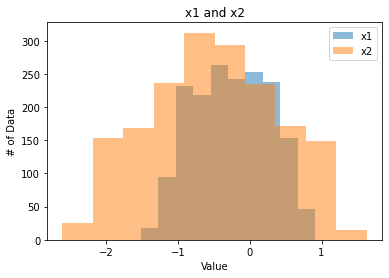

In [56]:
plt.hist(df.x1, alpha=0.5)
plt.hist(df.x2, alpha=0.5)
plt.ylabel("# of Data")
plt.xlabel("Value")
plt.title("x1 and x2")
plt.legend(["x1", "x2"])
plt.show()

Based on this plots, provide a description of your data:

Your response here: The largest amount of data is centered between -2 and 1, for both x1 and x2. A slight similarity can be noticed between both types of data but at a different scale. If we see the data at a higher definition, it can be noticed that x2, the movement of the amount of data per number, is quite variable, while in x1 it is more constant.

Plot in the same figure the boxplot of the two variables 

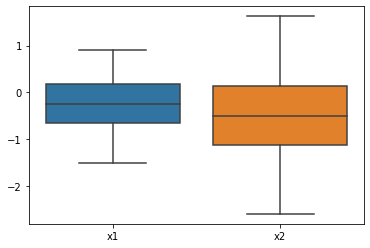

In [57]:
sns.boxplot(data=df[['x1', 'x2']])
plt.show()

Scatter plot of the two variables

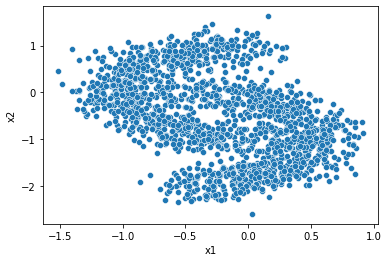

In [58]:
sns.scatterplot(x=df['x1'], y=df['x2'])
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: In the above graph you can identify a certain behavior of data in which you can almost see two bridges forming twelve. If we analyze the chart with the naked eye, it could be concluded that the largest amount of data is centered in the middle of both x1 and x2, corroborated by the bar chart at the top.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [59]:
kmeans = KMeans(
    n_clusters=2,
    n_init="auto",
    random_state=0
)
cluster_result=kmeans.fit_predict(df)
cluster_result

array([1, 0, 0, ..., 0, 1, 1], dtype=int32)

Add to your dataset a column with the assihned cluster to each data point

In [60]:
df["Cluster"] = cluster_result

Print the number associated to each cluster

In [61]:
print(df.Cluster.unique())
df

[1 0]


,x1,x2,Cluster
0,0.061241,-0.086113,1
1,0.282131,-0.478791,0
2,-0.063821,-1.920080,0
3,-0.631542,0.511644,1
4,0.626047,-1.148719,0
...,...,...,...
1755,0.000221,-1.239892,0
1756,-0.213566,1.134396,1
1757,-0.603604,-0.829541,0
1758,0.092442,0.521503,1


Print the centroids

In [64]:
clusCen=kmeans.cluster_centers_
clusCen

array([[ 0.06569397, -1.2051805 ],
       [-0.57107457,  0.22782639]])

Print the intertia metric

In [63]:
kmeans.inertia_

783.4344081027441

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

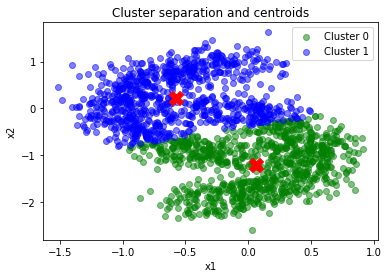

In [68]:
#DEF Num of Clusters
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]

plt.title("Cluster separation and centroids")
plt.xlabel("x1")
plt.ylabel("x2")

#First, Second clusters and points
plt.scatter(df1.x1, df1.x2, color = "Green", label = "Cluster 0", alpha = .5)
plt.scatter(df2.x1, df2.x2, color = "Blue", label = "Cluster 1", alpha = .5)
plt.scatter(clusCen[:,0],clusCen[:,1], marker = "X", color = "Red", s = 200)

plt.legend()

plt.show()

### Questions 

Provides a detailed description of your results

Your response: In the graph, it can be seen how the separation of data through clusters is carried out in the middle of the Y-axis. It is very important to highlight how the centroids, as in their name, can be inferred, are centered almost in the middle of their respective cluster. The conclusion of this clustering homework is that the data was successfully separated into clusters using the centroids, which were centered in the middle of each cluster. This shows that the clustering algorithm was successful in accurately separating the data.

## A5 Elbow plot

Compute the Elbow plot

In [70]:
SSE = []
K = [1,2,3,4,5,6,7,8,9,10]
#Iterate each element in K
for k in K:
    km = KMeans(n_clusters=k, n_init="auto").fit(df)
    SSE.append(km.inertia_)

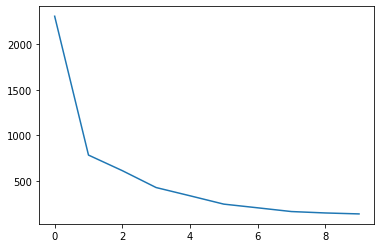

In [71]:
plt.plot(range(0,10),SSE)
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: Of all the iterations of K, which is the X axis for the graph, it can be seen very clearly how the knee is most evident at X=1. Therefore I consider that K=1 is the best cluster number.

Does this number of clusters agree with your inital guess? (argue your response)

Your response: No, at the beginning I indicated two clusters, since in the graph of the data they were formed as two inverse horizontal bridges.



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [86]:
from sklearn.datasets import make_blobs

ND, yInitial = make_blobs(n_samples=1000, n_features=3, centers=4, cluster_std=1.5, random_state=0)
newData_df = pd.DataFrame(data=ND,columns=["Var_1","Var_2","Var_3"])
newData_df

,Var_1,Var_2,Var_3
0,-1.848779,5.626976,10.643058
1,-0.334812,5.448288,9.278089
2,-3.410530,3.988682,-0.182462
3,-1.223259,7.790822,0.735116
4,-0.876696,6.308041,8.291400
...,...,...,...
995,-1.613154,4.569927,1.452596
996,-2.439528,6.301187,-1.039643
997,-2.052128,8.481617,9.048418
998,-1.586247,7.352701,0.511689


2) Plot the scatter plot of your data using the real cluster labels

In [106]:
kmeans = KMeans(
    n_clusters=4,
    n_init="auto",
    random_state=0
)
cluster_result=kmeans.fit_predict(newData_df)
newData_df["Cluster"] = cluster_result

In [107]:
newData_df

,Var_1,Var_2,Var_3,Cluster
0,-1.848779,5.626976,10.643058,1
1,-0.334812,5.448288,9.278089,1
2,-3.410530,3.988682,-0.182462,3
3,-1.223259,7.790822,0.735116,3
4,-0.876696,6.308041,8.291400,1
...,...,...,...,...
995,-1.613154,4.569927,1.452596,3
996,-2.439528,6.301187,-1.039643,3
997,-2.052128,8.481617,9.048418,1
998,-1.586247,7.352701,0.511689,3


In [92]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

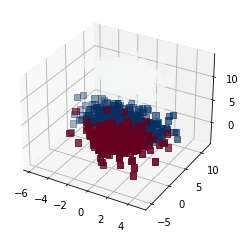

In [108]:

#DEF Num of Clusters
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(newData_df['Var_1'])
y = np.array(newData_df['Var_2'])
z = np.array(newData_df['Var_3'])

ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

plt.show()

3) Do K means clustering 

In [109]:
kmeans = KMeans(
    n_clusters=4,
    n_init="auto",
    random_state=0
)
cluster_result=kmeans.fit_predict(newData_df)
newData_df["Cluster"] = cluster_result
newData_df

,Var_1,Var_2,Var_3,Cluster
0,-1.848779,5.626976,10.643058,1
1,-0.334812,5.448288,9.278089,1
2,-3.410530,3.988682,-0.182462,3
3,-1.223259,7.790822,0.735116,3
4,-0.876696,6.308041,8.291400,1
...,...,...,...,...
995,-1.613154,4.569927,1.452596,3
996,-2.439528,6.301187,-1.039643,3
997,-2.052128,8.481617,9.048418,1
998,-1.586247,7.352701,0.511689,3


4) Plot the scatter plot of your data using the estimated cluster labels

In [110]:
clusCen=kmeans.cluster_centers_
clusCen

array([[ 1.19476291e+00,  4.15612177e+00,  1.91763006e+00,
         1.76855895e+00],
       [-1.20529265e+00,  7.71163847e+00,  9.29867271e+00,
         1.00000000e+00],
       [ 8.88692235e-01, -1.48812987e+00,  2.99981858e+00,
         1.55431223e-15],
       [-2.33006475e+00,  5.71908648e+00,  4.82215311e-01,
         2.00000000e+00]])

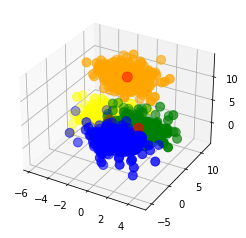

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(newData_df['Var_1'])
y = np.array(newData_df['Var_2'])
z = np.array(newData_df['Var_3'])
#We put the Cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2],
            s=100, c='red',
            label='Centroids')
#CLUSTER #1
ax.scatter(newData_df.loc[cluster_result == 0, "Var_1"], newData_df.loc[cluster_result == 0, "Var_2"], newData_df.loc[cluster_result == 0, "Var_3"], s=80, c='green', label='cluster 1')
#CLUSTER #2
ax.scatter(newData_df.loc[cluster_result == 1, "Var_1"], newData_df.loc[cluster_result == 1, "Var_2"], newData_df.loc[cluster_result == 1, "Var_3"], s=80, c='orange', label='cluster 1')
#CLUSTER #3
ax.scatter(newData_df.loc[cluster_result == 2, "Var_1"], newData_df.loc[cluster_result == 2, "Var_2"], newData_df.loc[cluster_result == 2, "Var_3"], s=80, c='blue', label='cluster 1')
#CLUSTER #4
ax.scatter(newData_df.loc[cluster_result == 3, "Var_1"], newData_df.loc[cluster_result == 3, "Var_2"], newData_df.loc[cluster_result == 3, "Var_3"], s=80, c='yellow', label='cluster 1')
plt.show()

### Questions 

Provides a detailed description of your results.

Your response: From the beginning we already know the most optimal number of clusters and that we created the database based on that information, that is why it looks very messy at first but after applying the clustering again with K-Means, everything is managed to be ordered back.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Personalmente pienso que si logre esta competencia con un alto nivel ya que casi todas las herramientas enseñadas en esta materia estan relacionadas a entender variables y a partir de eso construir algo. Por ejemplo el Clustering nos permite la agrupacion y clasificacion de datos, lo que cual nos permite analizar sus comportamientos y claro entenderlos mejor. Un ejemplo que vimos en clase puede ser relacionado a la base de datos de Iris.csv en donde se vio la relaciones entre Selpalos y Petalos.


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


Tu respuesta: Personalmente pienso que si logre esta competencia con un alto nivel ya que se lograron crear sistemas visuales en donde se muestran datos ya clusterizados/organizados, por tanto mostrando un analisis grafico de como es que se comportaban los datos. Esto finalmente se podia ver en proyectos como el de los Petalos y Sepalos, en este mismo proyecto.